In [1]:
from test_sys import *
from fields import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cProfile

Load IGRF coefficients ...


In [2]:
z = t89(1)

In [3]:
z(np.array([-5 * Re, 0, 0]))

array([2.22959901e-08, 5.89034458e-09, 2.07489609e-07])

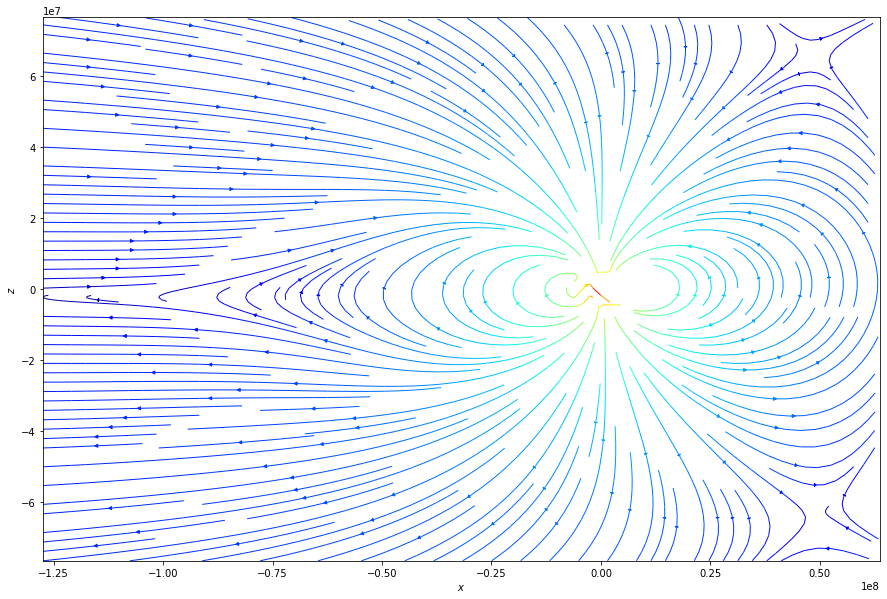

In [4]:
plot_field(z,  'y', 50, [-20 * Re, 10 * Re], [-12 * Re, 12 * Re], (15, 10))

In [5]:
e_field = zero_field()
b_field = t89(1)
s = solver(relativistic_boris(e_field, b_field))

In [8]:
%%timeit

#import cProfile

num_particles = 10
T = 1
dt = 1e-3
steps = int(T / dt)
 
#pr = cProfile.Profile()
#pr.enable()

history, intrinsic = populate(num_particles,
                              steps,
                              e_field,
                              b_field,
                              delta(np.array([-Re, 0., 0.])),
                              delta(1e5),
                              delta(np.pi / 4),
                              uniform(0., 2 * np.pi)
                             )

s(history, intrinsic, dt)

#pr.disable()
 
#pr.print_stats(sort='time')

"""
fig = plt.figure(figsize = plt.figaspect(1) * 7)
ax = fig.add_subplot(111, projection='3d')

for i in range(num_particles):
    pos = history[i, :, 0]
    ax.plot(pos[:, 0], pos[:, 1], pos[:, 2])

plt.show()
"""

321 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
